# **DSC650**
- **Name**: Rio Atmadja
- **Description**: Milestone Three (**Terrorism in Iraq**) 

In [1]:
import pandas as pd 
import numpy as np
import gc 

from acme_news.utils.constants import MIDDLE_EAST_REGIONS
import seaborn as sns 
import matplotlib.pyplot as plt 

from typing import Dict, List 
from pandas.core.frame import DataFrame
from pandas.core.series import Series

### **Load the terrorist database** 

In [2]:
pd.options.display.max_columns = 150
terrorist_db: DataFrame = pd.read_excel("./terrorism_db.xlsx")
middle_east_regions: DataFrame = terrorist_db[terrorist_db.country_txt.isin(list(map(lambda region: region.title(), MIDDLE_EAST_REGIONS)))].copy()
middle_east_regions['incident_date'] = pd.to_datetime(middle_east_regions.apply(lambda row: np.nan if row['imonth'] == 0 or row['iday'] == 0 else f"{row['iyear']}-{row['imonth']}-{row['iday']}", axis=1), format="%Y-%m-%d")
middle_east_regions.index = np.arange(1,middle_east_regions.shape[0]+1)

iraq_df: DataFrame = middle_east_regions.query("country_txt == 'Iraq'").copy()
iraq_df.index = np.arange(1, iraq_df.shape[0]+1)
iraq_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,incident_date
1,197503010002,1975,3,1,NaN,0,NaT,95,Iraq,10,Middle East & North Africa,Nineveh,Mosul,36.354145,43.143570,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Iraqi Airways,B-737,95.0,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armed,0.0,0.0,0.0,1.0,0.0,1.0,0,NaN,NaN,NaN,NaN,1.0,-99.0,0.0,NaN,NaN,Iran,Iran,1.0,5000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hijacking DB,-9,-9,0,-9,NaN,1975-03-01
2,197612150001,1976,12,15,NaN,0,NaT,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,Airport terminal,95.0,Iraq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,28.0,Dynamite/TNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive - 8 kg TNT,10.0,NaN,NaN,285.0,NaN,NaN,1,3.0,Minor (likely < $1 million),2000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN,1976-12-15
3,197612180001,1976,12,18,NaN,1,1977-03-29,95,Iraq,10,Middle East & North Africa,Unknown,Penjwon,NaN,NaN,5.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Polish government,agricultural experts in NE Iraq,161.0,Poland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kurdish Democratic Party-Iraq (KDP),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,5.0,0.0,0.0,101.0,NaN,Iraq,1.0,0.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,1.0,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,1976-12-18
4,197612240001,1976,12,24,NaN,0,NaT,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,22,Violent Political Party,109.0,Party Official/Candidate/Other Personnel,Popular Front for the Liberation of Palestine ...,Personnel,155.0,West Bank and Gaza Strip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,

### **Delete unused dataframe**

In [4]:
%%capture
del terrorist_db
gc.collect()

del middle_east_regions
gc.collect()

### **Statistics Description** 

In [5]:
iraq_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.675500e+04,26755.000000,26755.000000,26755.000000,26755.000000,26755.0,26755.0,26593.000000,26593.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,26755.000000,3329.000000,26755.000000,26755.000000,26755.000000,26755.000000,536.000000,24.00000,26755.000000,24911.000000,26726.000000,2096.000000,2051.000000,2040.000000,184.000000,175.000000,180.000000,26754.000000,101.000000,4.0,26755.000000,24044.000000,25872.000000,26613.000000,3128.000000,103.000000,18.000000,4.00000,2.000000,586.000000,26755.000000,25215.000000,1055.000000,810.000000,140.000000,120.000000,0.0,0.0,25939.000000,26442.000000,25991.000000,25362.000000,26372.000000,25717.000000,26755.000000,9557.000000,5.822000e+03,26755.000000,1135.000000,1130.000000,318.000000,830.000000,1319.000000,3.200000e+01,2.300000e+01,2.300000e+01,23.000000,1127.000000,1088.000000,26755.000000,26755.000000,26755.000000,26755.000000
mean,2.013001e+11,2012.934405,6.463278,15.630947,0.028406,95.0,10.0,34.045410,44.071478,1.234162,0.078453,0.997683,0.998654,0.892058,0.118034,1.118354,0.152607,0.883947,0.100990,3.136274,2.830224,4.00000,9.357653,49.523704,98.372297,11.237118,60.294490,104.357353,11.581522,62.302857,115.477778,0.023996,0.118812,0.0,0.000037,-87.536932,-0.623454,-0.001541,7.403133,0.174757,7.111111,0.50000,6.500000,-8.109215,6.239507,13.925322,7.488152,10.367901,6.600000,6.775000,NaN,NaN,3.123443,0.010022,0.490901,5.454459,0.017443,0.033830,-2.125995,3.229256,2.739719e+03,0.038086,17.809692,-0.160177,-84.666667,-68.730120,-0.931008,1.741362e+06,6.521739e+05,1.197091e+07,-4.304348,5.472050,-44.283088,-6.610241,-6.380564,0.023734,-6.182246
std,4.048898e+08,4.050597,3.447741,8.776544,0.166133,0.0,0.0,1.213471,0.871280,0.694976,0.314980,0.048084,0.036658,0.310314,0.409904,0.480812,0.359615,0.320295,0.301322,1.460337,1.804227,2.44949,6.460340,28.818287,37.636319,5.438533,24.608586,77.150975,5.181291,23.671962,120.624467,0.153041,0.325181,0.0,0.006114,32.827122,8.111195,1.088814,1.058060,0.381616,0.832352,0.57735,0.707107,2.746563,1.727462,5.586660,3.120843,6.311091,2.843141,6.050852,NaN,NaN,15.364757,0.239948,3.155466,18.537423,0.561826,0.776927,4.238490,0.445514,1.530814e+05,0.283494,201.085785,4.167869,35.382126,68.278253,2.785820,5.574785e+06,3.127716e+06,5.733834e+07,20.642927,1.681809,108.319406,3.976813,4.362169,0.252070,4.465668
min,1.975030e+11,1975.000000,1.000000,0.000000,0.000000,95.0,10.0,29.167840,38.922878,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,1.000000,1.000000,15.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.0,0.000000,-99.000000,-99.000000,-9.000000,1.000000,0.000000,6.000000,0.00000,6.000000,-9.000000,2.000000,1.000000,2.000000,1.000000,5.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,0.000000e+00,-9.900000e+01,-99.000000,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.011030e+11,2011.000000,3.000000,8.000000,0.000000,95.0,10.0,33.303567,43.668375,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.0000

### **Null Values**

In [6]:
pd.options.display.max_rows = 150
pd.DataFrame(iraq_df.isna().sum().sort_values(ascending=False), columns=['Null Values'])

,Null Values
weaptype4,26755
weapsubtype4_txt,26755
gsubname3,26755
weapsubtype4,26755
weaptype4_txt,26755
claimmode3_txt,26753
claimmode3,26753
gname3,26751
claim3,26751
guncertain3,26751


### **Known Terrorist Groups in Iraq**
According to a report from the State Department, here are the most dangerous terrorist groups in Iraq.
- **Domestic Threats**: **AAI** (Ansar al-Islam), JRTN (Jaysh Rijal al-Tariq al-Naqshabandi), **KH** (Kata'ib Hizballah), **PKK** (Kurdistan Workers' Party), **AAH** (Asa'ib Ahl al-Haq)
- **Foreign Threats**: **ISIS** (Islamic State of Iraq and the Levant), **IRGC-QF** (Islamic Revolutionary Guard Corps/Qods Force)

In [7]:
pd.DataFrame(iraq_df['gname'].value_counts())

,gname
Unknown,19522
Islamic State of Iraq and the Levant (ISIL),5857
Al-Qaida in Iraq,632
Islamic State of Iraq (ISI),145
Asa'ib Ahl al-Haqq,72
Gunmen,57
Tawhid and Jihad,52
Kurdistan Workers' Party (PKK),42
Al-Naqshabandiya Army,35
Muslim extremists,32


### **Common Attck Methods used by the terrorist groups**

In [8]:
pd.DataFrame(iraq_df['attacktype1_txt'].value_counts())

,attacktype1_txt
Bombing/Explosion,19589
Armed Assault,3463
Assassination,1423
Hostage Taking (Kidnapping),1047
Unknown,986
Facility/Infrastructure Attack,195
Hostage Taking (Barricade Incident),30
Hijacking,13
Unarmed Assault,9


## **Foreign Threats: (Islamic State of Iraq and ash-Sham)**
**aka** – Islamic State in the Levant (ISIL); Islamic State; Islamic State in Iraq; ad-Dawla al-Islamiyya fi al-’Iraq wa-sh-Sham; Daesh; Dawla al Islamiya; al-Qa’ida in Iraq; al-Qa’ida Group of Jihad in Iraq; al-Qa’ida Group of Jihad in the Land of the Two Rivers; al-Qa’ida in Mesopotamia; al-Qa’ida in the Land of the Two Rivers; al-Qa’ida of Jihad in Iraq; al-Qa’ida of Jihad Organization in the Land of the Two Rivers; al-Qa’ida of the Jihad in the Land of the Two Rivers; al-Tawhid; Jam’at al-Tawhid Wa’al-Jihad; Tanzeem Qa’idat al Jihad/Bilad al Raafidaini; Tanzim Qa’idat al-Jihad fi Bilad al-Rafidayn; the Monotheism and Jihad Group; the Organization Base of Jihad/Country of the Two Rivers; the Organization Base of Jihad/Mesopotamia; the Organization of al-Jihad’s Base in Iraq; the Organization of al-Jihad’s Base in the Land of the Two Rivers; the Organization of al-Jihad’s Base of Operations in Iraq; the Organization of al-Jihad’s Base of Operations in the Land of the Two Rivers; the Organization of Jihad’s Base in the Country of the Two Rivers; al-Zarqawi Network; Al-Furqan Establishment for Media Production.

**history** – formed in the 1990s under the name al-Tawhid wal-Jihad by Jordanian militant Abu Mus’ab al-ZARQAWI to oppose the presence of Western military forces in the Middle East and the West’s support for, and the existence of, Israel; in late 2004, ZARQAWI pledged allegiance to al-Qa’ida (AQ) and the group became known as al-Qa’ida in Iraq (AQI); ZARQAWI led AQI against US and Coalition Forces in Iraq until his death in June 2006; in October 2006, renamed itself the Islamic State in Iraq; in 2013, adopted the moniker ISIS to express regional ambitions and expanded operations to Syria where it established control of a large portion of eastern Syria; in June 2014, then ISIS leader Abu Bakr al-BAGHDADI declared a worldwide Islamic caliphate with its capital in Raqqa, Syria; by 2015, held an area in Iraq and Syria with an estimated population of between 8 and 12 million, including the Iraqi city of Mosul; imposed a brutal version of Islamic law in the areas under its control and became known for brutality against perceived enemies, including the murder of large numbers of civilians, its large contingent of foreign fighters, and a substantial social media presence; by the end of 2017, had lost control of its largest population centers in both Iraq and Syria, including Mosul and Raqqa, to US and allied military forces; lost its final piece of territory in Baghuz, Syria in March 2019; has since transitioned to an insurgency, reverting to guerrilla warfare and more traditional terrorist tactics, developing sleeper cells, and assimilating into the broader population in Iraq and Syria where it continues to maintain a considerable presence and conduct operations in 2020

**goals** – replace the world order with a global Islamic state based in Iraq and Syria, expand its branches and networks globally, and rule according to ISIS’s strict interpretation of Islamic law
### **Attack Method used by the ISIL (Islamic State of Iraq and the Levant)**
**targets, tactics, and weapons** – targets governments or groups that oppose its hardline Islamist ideology, including military forces and security services, government officials, perceived Sunni rivals, Westerners, and religious and ethnic minorities; known for indiscriminate killings, mass executions, political assassinations, torture, kidnappings, rape and sexual slavery, forced marriages and religious conversions, conscripting children, publishing videos of beheadings, and using civilians as human shields; has engaged in the systematic destruction of antiquities, places of worship, monasteries, and other elements of the cultural heritage of ancient communities; attacks places of worship, shopping centers and markets, tourist sites, hotels, concert venues, restaurants, train stations, nightclubs, government buildings, and infrastructure targets; attacks on civilians typically involve the use of small arms, vehicle bombs, explosive vests, and ramming vehicles into crowds of people; employs insurgent/guerrilla-style hit-and-run and terrorist attacks against military and security forces that include the use of ambushes, snipers, complex ground assaults, mortar and rocket attacks, road side bombs, and suicide devices; possesses a wide variety of weapons, including small arms, light and heavy machine guns, rocket-propelled grenades, mortars, rockets, man-portable air defense systems (MANPADS), anti-tank guided missiles, and a variety of improvised explosive devices, including unmanned aerial vehicles (UAVs) armed with explosives

In [9]:
pd.DataFrame(iraq_df.query("gname == 'Islamic State of Iraq and the Levant (ISIL)' ").groupby(['attacktype1_txt']).size().sort_values(ascending=False)).rename({0: 'Number of Attack Methods'}, axis=1)

,Number of Attack Methods
attacktype1_txt,
Bombing/Explosion,3729
Unknown,840
Hostage Taking (Kidnapping),534
Armed Assault,522
Assassination,150
Facility/Infrastructure Attack,62
Hostage Taking (Barricade Incident),16
Hijacking,4


### **The Number of attack methods used by the ISIL between 2013 to 2019**

In [22]:
iraq_df.query("gname == 'Islamic State of Iraq and the Levant (ISIL)'").groupby(['iyear', 'attacktype1_txt']).size().unstack('iyear').replace({np.nan:0}).astype(int).sort_values(by=list(map(lambda year: year,range(2013,2020))), ascending=False)

iyear,2013,2014,2015,2016,2017,2018,2019
attacktype1_txt,,,,,,,
Bombing/Explosion,310,703,634,835,743,353,151
Armed Assault,14,120,54,59,96,85,94
Assassination,8,31,30,21,10,38,12
Hostage Taking (Barricade Incident),4,4,2,2,2,1,1
Hostage Taking (Kidnapping),3,141,104,121,109,44,12
Unknown,2,79,167,180,221,125,66
Facility/Infrastructure Attack,0,19,5,4,13,8,13
Hijacking,0,4,0,0,0,0,0


### **Attacked method trends conducted by the ISIL**

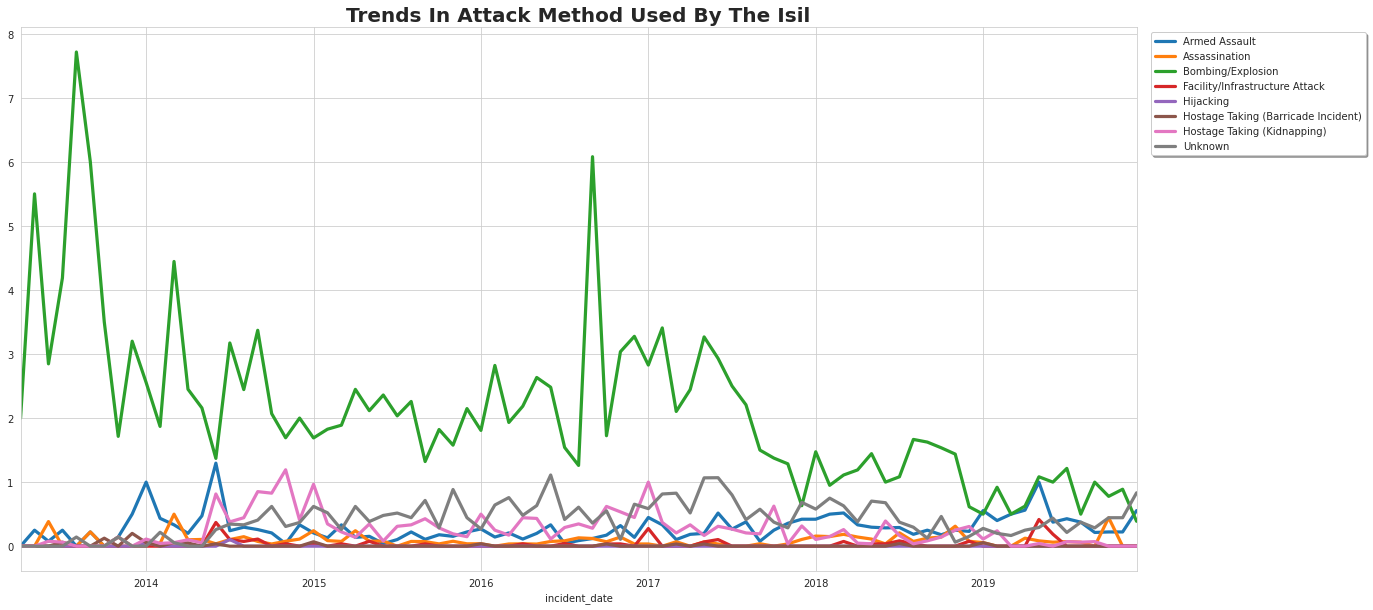

In [18]:
isil_attack_method: DataFrame = iraq_df.query("gname == 'Islamic State of Iraq and the Levant (ISIL)' ").groupby(['incident_date', 'attacktype1_txt']).size().unstack('attacktype1_txt').replace({np.nan: 0})
ax = isil_attack_method[isil_attack_method.columns.tolist()].resample('M').mean().interpolate().plot(figsize=(20,10), linewidth=3.2)
ax.set_title("Trends in attack method used by the ISIL".title(), fontweight='bold', fontsize=20)
ax.grid(True)
ax.legend(bbox_to_anchor=(1.21,1), shadow=True)

### **Number of U.S personel/citizens killed by the ISIL in Iraq**

In [12]:
pd.DataFrame(iraq_df.pivot_table(values='nkillus', index='iyear', columns='provstate', aggfunc='sum').replace({np.nan:0}).drop('Unknown', axis=1).sum(axis=1), columns=['Total Number of Fatalities'])

,Total Number of Fatalities
iyear,
1975,0.0
1976,0.0
1979,0.0
1980,0.0
1981,0.0
1982,0.0
1983,0.0
1984,0.0
1987,0.0


### **Top 25 City in IRAQ control by the ISIL**

In [13]:
pd.DataFrame(iraq_df.query("gname == 'Islamic State of Iraq and the Levant (ISIL)' ")['city'].value_counts().head(25))

,city
Mosul,709
Baghdad,692
Ramadi,166
Unknown,145
Fallujah,120
Dawr district,110
Tikrit,96
Baiji,91
Hawijah district,84
Kirkuk,77


### **Overall Iraq's Infrastructures Targeted by the ISIL**

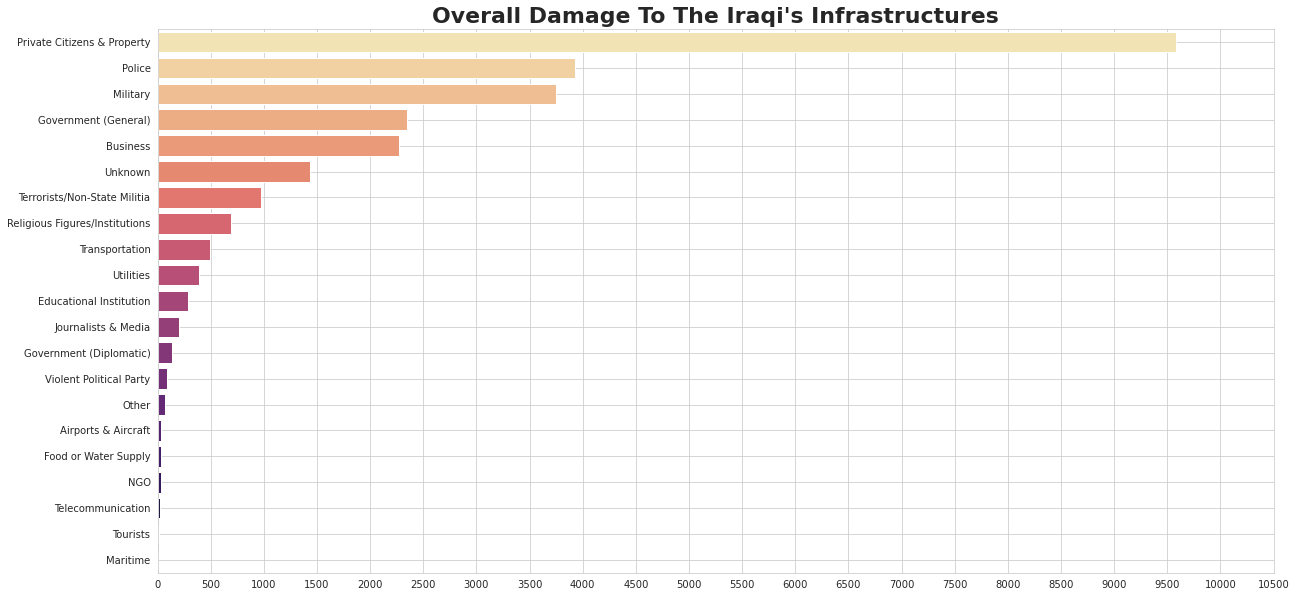

In [67]:
plt.rcParams['figure.figsize'] = (20,10)
iraq_infra, n_damages = zip(*iraq_df.targtype1_txt.value_counts().to_dict().items())
ax = sns.barplot(y=list(iraq_infra), x=list(n_damages), palette='magma_r')
ax.set_title("Overall Damage To The Iraqi's Infrastructures", 
             fontweight='bold', 
             fontsize=22)
ax.set_xticks(range(0,11000,500))
ax.grid(True)

### **General Iraqi Government, Police, and Military Infrastructures targeted by the ISIL**
- **Ministry of Defense**: Iraqi Army, Army Aviation Command, Iraqi Navy, Iraqi Air Force, Iraqi Air Defense Command, Special Forces Command
- **National-Level Security Forces**: Iraqi Counterterrorism Service (CTS; a Special Forces Division aka the "Golden Division"), Prime Minister's Special Forces Division, Presidential Brigades
- **Ministry of Interior**: Federal Police Forces Command, Border Guard Forces Command, Federal Intelligence and Investigations Agency, Emergency Response Division, Facilities Protection Directorate, and Energy Police Directorate
- Popular Mobilization Commission and Affiliated Forces (PMF)
- Ministry of Pershmerga (Kurdistan Regional Government) (2020)

**Note**: the PMF is a collection of approximately 50 paramilitary militias of different sizes and with varying political interests

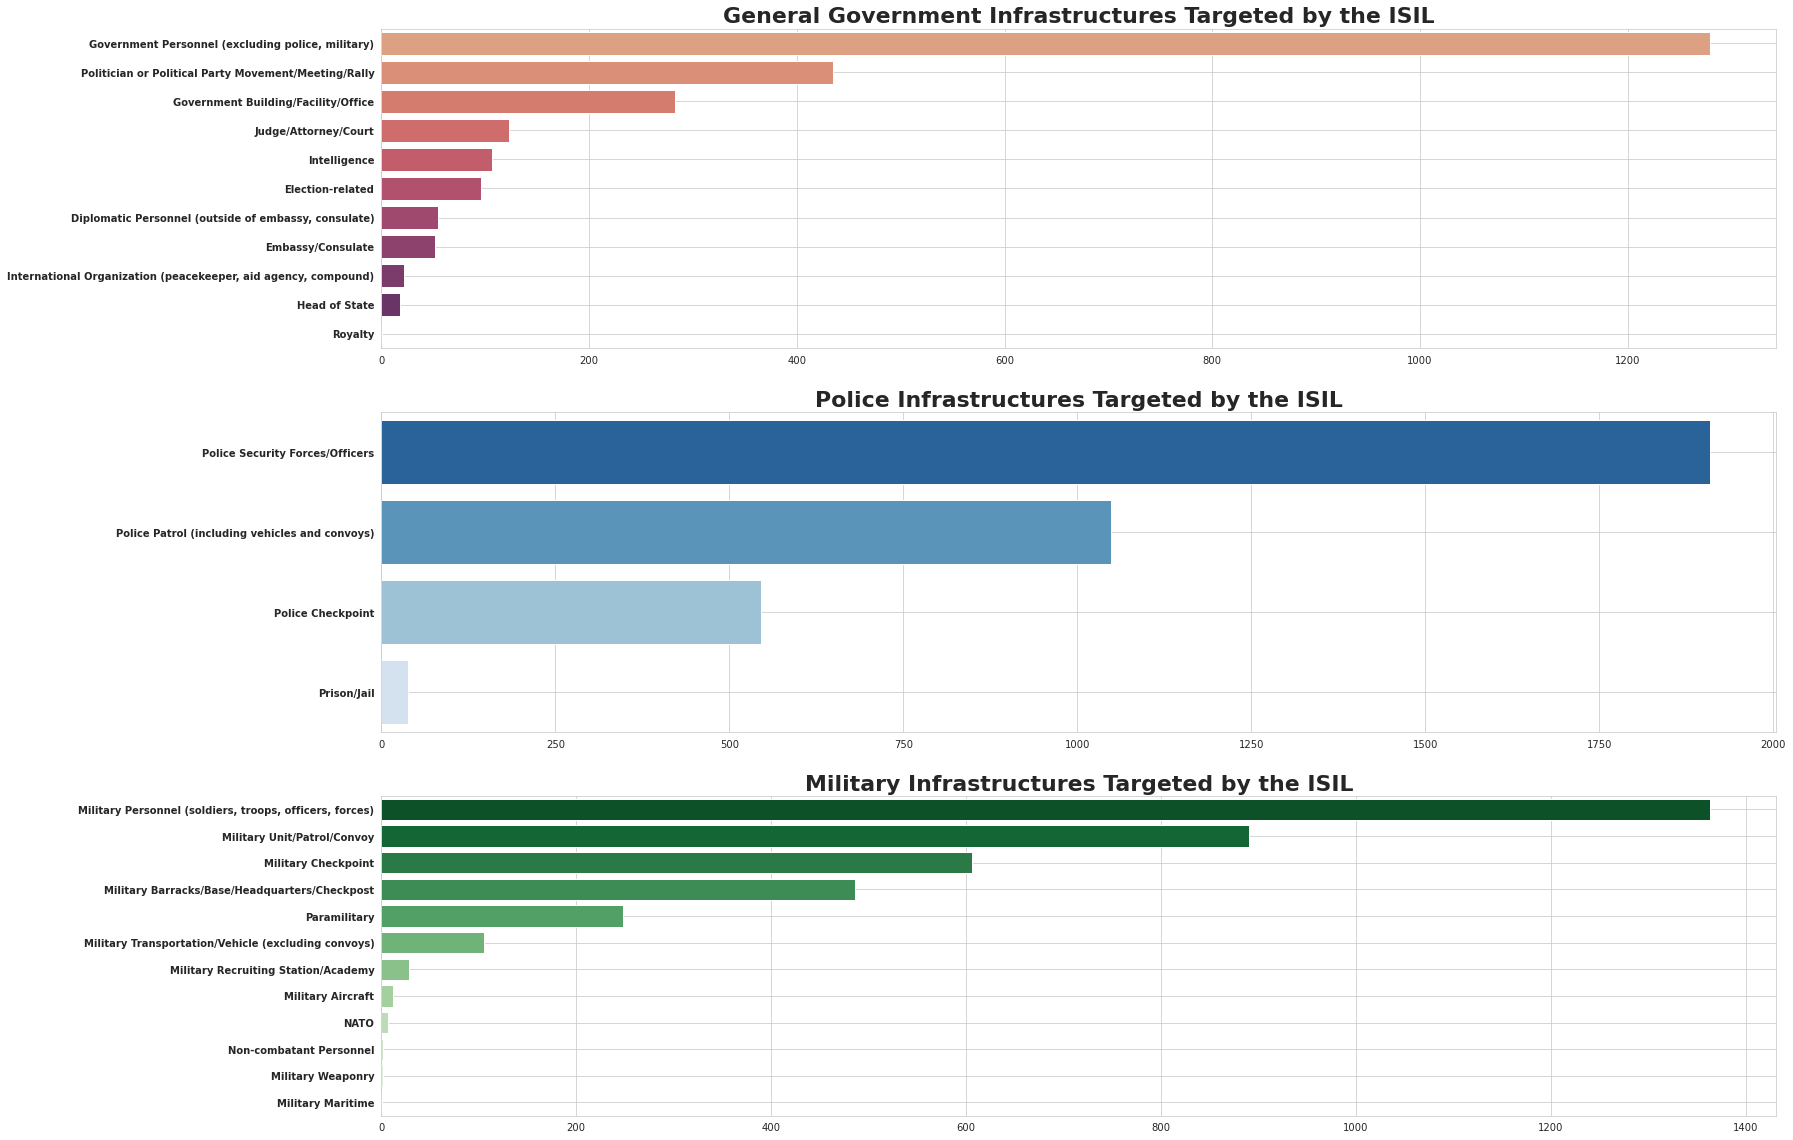

In [55]:
plt.rcParams['figure.figsize'] = (25,20)

figure = plt.figure()
ax = figure.add_subplot(3,1,1)
gov_infra, n_damages = zip(*iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in np.arange(14,22).tolist() + np.arange(45,48).tolist())].targsubtype1_txt.value_counts().to_dict().items())
sns.barplot(x=list(n_damages), 
            y=list(gov_infra), 
            palette='flare', 
            ax=ax)

ax.set_title(label="General Government Infrastructures Targeted by the ISIL", 
             fontweight='bold', 
             fontsize=22)

ax.set_yticklabels(list(gov_infra), fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(3,1,2)
police_infra, n_damages = zip(*iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in range(23,27))].targsubtype1_txt.value_counts().to_dict().items())
sns.barplot(x=list(n_damages), 
            y=list(police_infra), 
            palette='Blues_r', 
            ax=ax)

ax.set_title(label="Police Infrastructures Targeted by the ISIL", 
             fontweight='bold', 
             fontsize=22)

ax.set_yticklabels(list(police_infra), fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(3,1,3)
military_infra, n_damages = zip(*iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in range(27,40))].targsubtype1_txt.value_counts().to_dict().items())
sns.barplot(x=list(n_damages), 
            y=list(military_infra), 
            palette='Greens_r', 
            ax=ax)

ax.set_title(label="Military Infrastructures Targeted by the ISIL", 
             fontweight='bold', 
             fontsize=22)

ax.set_yticklabels(list(military_infra), fontweight='bold')
ax.grid(True)

### **Weapon types used by the ISIL**

In [25]:
pd.DataFrame(iraq_df.weaptype1_txt.value_counts())

,weaptype1_txt
Explosives,20289
Firearms,4635
Unknown,1508
Incendiary,164
Melee,87
Chemical,52
Other,10
Sabotage Equipment,6
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",4


### **Sub-type weapons used by the ISIL**

In [27]:
pd.DataFrame(iraq_df.weapsubtype1_txt.value_counts())

,weapsubtype1_txt
Unknown Explosive Type,9081
Vehicle,4917
Unknown Gun Type,4008
Other Explosive Type,2074
"Projectile (rockets, mortars, RPGs, etc.)",1424
Sticky Bomb,1170
Suicide (carried bodily by human being),1090
Automatic or Semi-Automatic Rifle,384
Grenade,272
Arson/Fire,152


### **Different types of weapons were used to attack the Iraqi government infrastructures**

In [112]:
iraq_infra: DataFrame = iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in np.arange(14,22).tolist() + np.arange(45,48).tolist())].groupby(['targsubtype1_txt', 'weaptype1_txt']).size().unstack("targsubtype1_txt").replace({np.nan:0})
iraq_infra.sort_values(by=iraq_infra.index.tolist(), ascending=False, axis=1)   

targsubtype1_txt,"Government Personnel (excluding police, military)",Government Building/Facility/Office,Politician or Political Party Movement/Meeting/Rally,Judge/Attorney/Court,Election-related,Intelligence,Embassy/Consulate,"Diplomatic Personnel (outside of embassy, consulate)","International Organization (peacekeeper, aid agency, compound)",Head of State,Royalty
weaptype1_txt,,,,,,,,,,,
Explosives,688.0,253.0,247.0,76.0,66.0,52.0,46.0,23.0,16.0,14.0,0.0
Firearms,551.0,24.0,170.0,43.0,23.0,50.0,5.0,29.0,6.0,4.0,1.0
Incendiary,1.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Melee,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unknown,32.0,4.0,13.0,4.0,6.0,5.0,1.0,3.0,0.0,0.0,0.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Different types of weapons were used to attack the Iraqi Military infrastructures**

In [117]:
iraq_infra: DataFrame = iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in range(27,40))].groupby(['targsubtype1_txt', 'weaptype1_txt']).size().unstack("targsubtype1_txt").replace({np.nan:0})
iraq_infra.sort_values(by=iraq_infra.columns.tolist(), ascending=False, axis=0)   

targsubtype1_txt,Military Aircraft,Military Barracks/Base/Headquarters/Checkpost,Military Checkpoint,Military Maritime,"Military Personnel (soldiers, troops, officers, forces)",Military Recruiting Station/Academy,Military Transportation/Vehicle (excluding convoys),Military Unit/Patrol/Convoy,Military Weaponry,NATO,Non-combatant Personnel,Paramilitary
weaptype1_txt,,,,,,,,,,,,
Explosives,9.0,338.0,279.0,1.0,823.0,27.0,78.0,808.0,2.0,6.0,0.0,122.0
Firearms,3.0,59.0,255.0,0.0,308.0,1.0,20.0,65.0,0.0,1.0,2.0,52.0
Unknown,0.0,84.0,70.0,0.0,210.0,0.0,6.0,17.0,0.0,0.0,0.0,72.0
Chemical,0.0,2.0,1.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Incendiary,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Melee,0.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Different types of weapons were used to attack the Iraqi Police infrastructures**

In [120]:
iraq_infra: DataFrame = iraq_df[iraq_df.targsubtype1.apply(lambda gov_infra: gov_infra in range(23,27))].groupby(['targsubtype1_txt', 'weaptype1_txt']).size().unstack("targsubtype1_txt").replace({np.nan:0})
iraq_infra.sort_values(by=iraq_infra.columns.tolist(), ascending=False, axis=0)   

targsubtype1_txt,Police Checkpoint,Police Patrol (including vehicles and convoys),Police Security Forces/Officers,Prison/Jail
weaptype1_txt,,,,
Explosives,261.0,937.0,1222.0,25.0
Firearms,245.0,99.0,564.0,13.0
Unknown,34.0,12.0,108.0,1.0
Chemical,4.0,0.0,2.0,0.0
Incendiary,1.0,0.0,6.0,0.0
Melee,0.0,0.0,7.0,0.0


### **Number of Iraqi police officers that the ISIL has kidnaped**

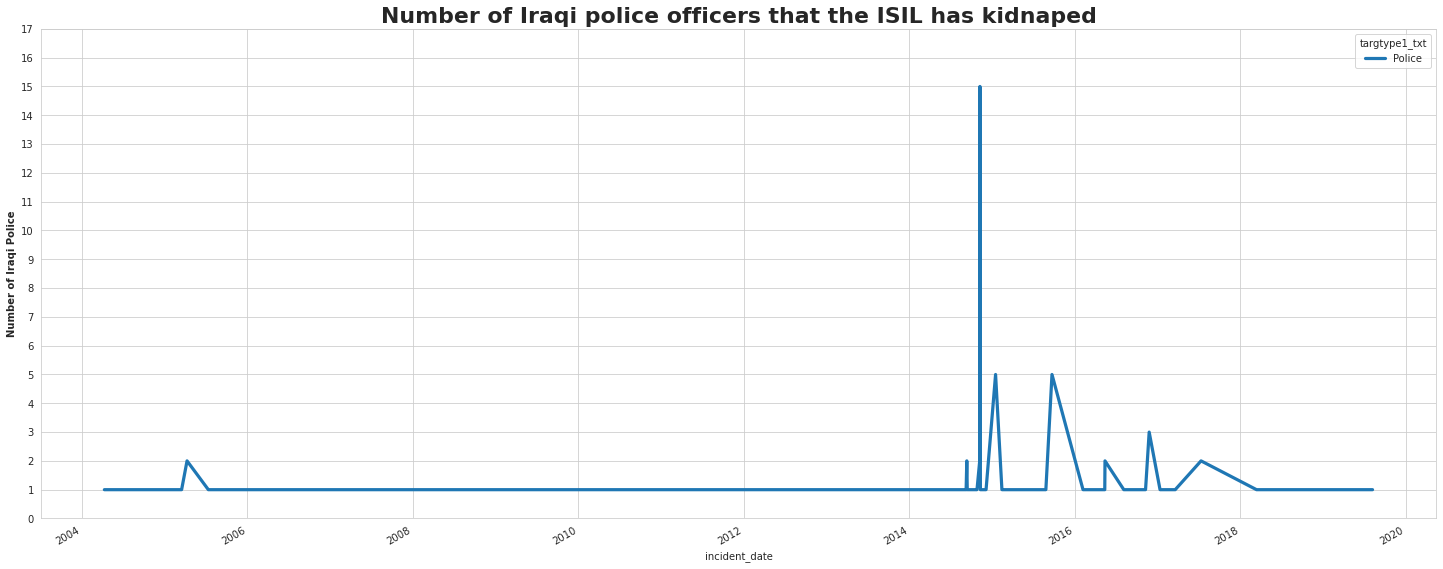

In [153]:
figure = plt.figure()
ax = figure.add_subplot(1,1,1)
iraqi_police_df: DataFrame = iraq_df.query("targsubtype1 == 25 and ishostkid == 1")
iraqi_police_df.groupby(['incident_date', 'targtype1_txt']).size().unstack("targtype1_txt").plot(figsize=(25,10), ax=ax, linewidth=3.2)
ax.set_title("Number of Iraqi police officers that the ISIL has kidnaped", fontweight='bold', fontsize=22)
ax.set_ylabel("Number of Iraqi Police", fontweight='bold')
ax.set_yticks(range(0,18))
ax.grid(True)

### **Distribution of the Number of fatalities, injuries, and kidnapping involving U.S citizens**

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

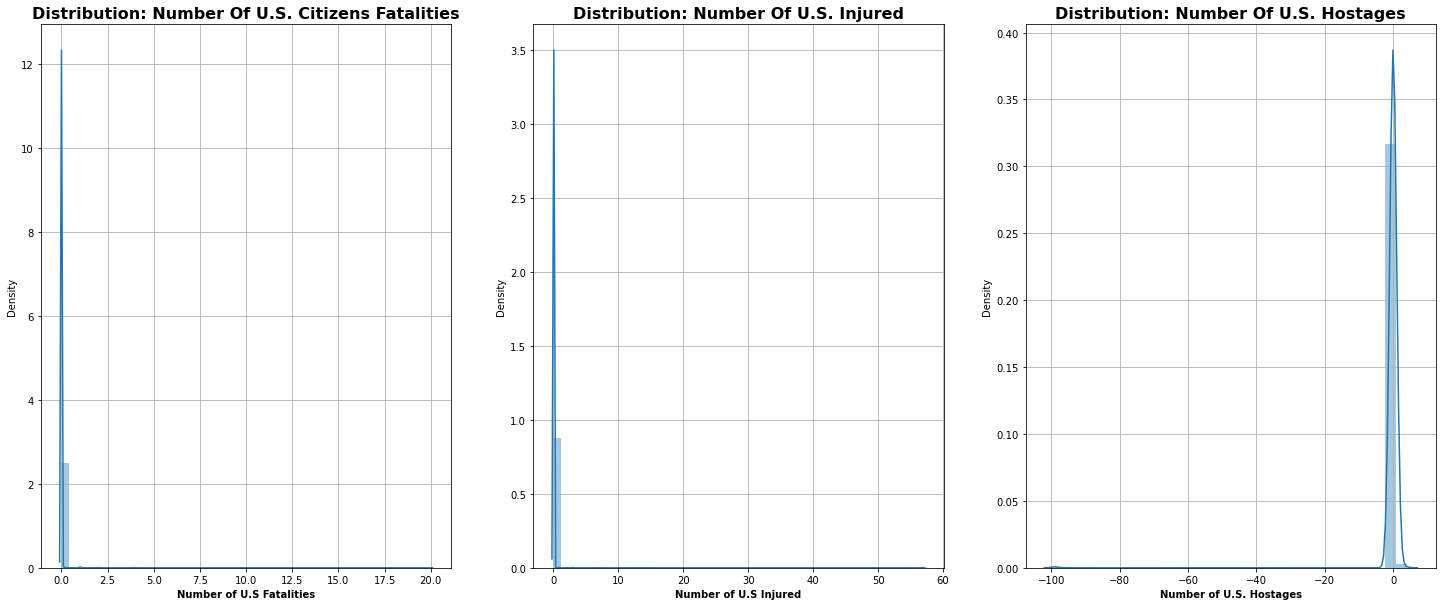

In [15]:
plt.rcParams['figure.figsize'] = (25,10)
figure = plt.figure() 

ax = figure.add_subplot(1,3,1)
sns.distplot(iraq_df.nkillus,ax=ax)
ax.set_title(label="Distribution: Number of U.S. citizens fatalities".title(), 
             fontweight='bold', 
             fontsize=16)
ax.set_xlabel("Number of U.S Fatalities", fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(1,3,2)
sns.distplot(iraq_df.nwoundus,ax=ax)
ax.set_title(label="Distribution: Number of U.S. Injured".title(), 
             fontweight='bold', 
             fontsize=16)
ax.set_xlabel("Number of U.S Injured", fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(1,3,3)
sns.distplot(iraq_df.nhostkidus,ax=ax)
ax.set_title(label="Distribution: Number of U.S. Hostages".title(), 
             fontweight='bold', 
             fontsize=16)
ax.set_xlabel("Number of U.S. Hostages", fontweight='bold')
ax.grid(True)

### **Number of `Fatalities`, `Kidnapping`, and `Injuries` from 1970 to 2019**

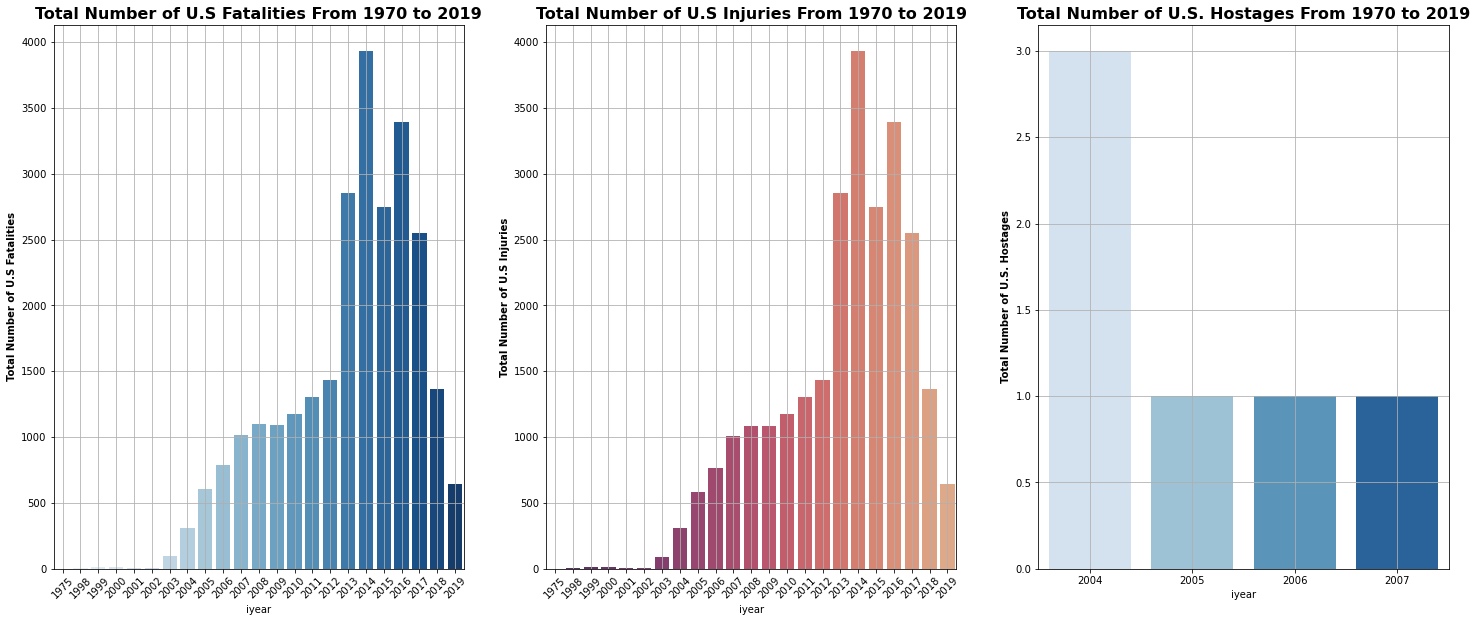

In [16]:
figure = plt.figure() 
ax = figure.add_subplot(1,3,1)

yearly_fatalities: Series = pd.crosstab(iraq_df.iyear, iraq_df.nkillus).sum(axis=1)
sns.barplot(x=yearly_fatalities.index, 
            y=yearly_fatalities.values, 
            palette='Blues',
            ax=ax)

ax.set_xticklabels(yearly_fatalities.index.tolist(), rotation=45)
ax.set_title("Total Number of U.S Fatalities From 1970 to 2019", fontweight='bold', fontsize=16)
ax.set_ylabel("Total Number of U.S Fatalities", fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(1,3,2)
yearly_injuries: Series = pd.crosstab(iraq_df.iyear, iraq_df.nwoundus).sum(axis=1)
sns.barplot(x=yearly_injuries.index, 
            y=yearly_injuries.values, 
            palette='flare_r',
            ax=ax)

ax.set_xticklabels(yearly_injuries.index.tolist(), rotation=45)
ax.set_title("Total Number of U.S Injuries From 1970 to 2019", fontweight='bold', fontsize=16)
ax.set_ylabel("Total Number of U.S Injuries", fontweight='bold')
ax.grid(True)


ax = figure.add_subplot(1,3,3)
hostages: DataFrame = iraq_df.query("nhostkidus == 1")
yearly_kidnapping: Series = pd.crosstab(hostages.iyear, hostages.nhostkidus).sum(axis=1)
sns.barplot(x=yearly_kidnapping.index, 
            y=yearly_kidnapping.values, 
            palette='Blues',
            ax=ax)

ax.set_xticklabels(yearly_kidnapping.index.tolist(), rotation=0)
ax.set_title("Total Number of U.S. Hostages From 1970 to 2019", fontweight='bold', fontsize=16)
ax.set_ylabel("Total Number of U.S. Hostages", fontweight='bold')
ax.grid(True)

### **Number of U.S. citizens who died in incidents occurring outside of the U.S**

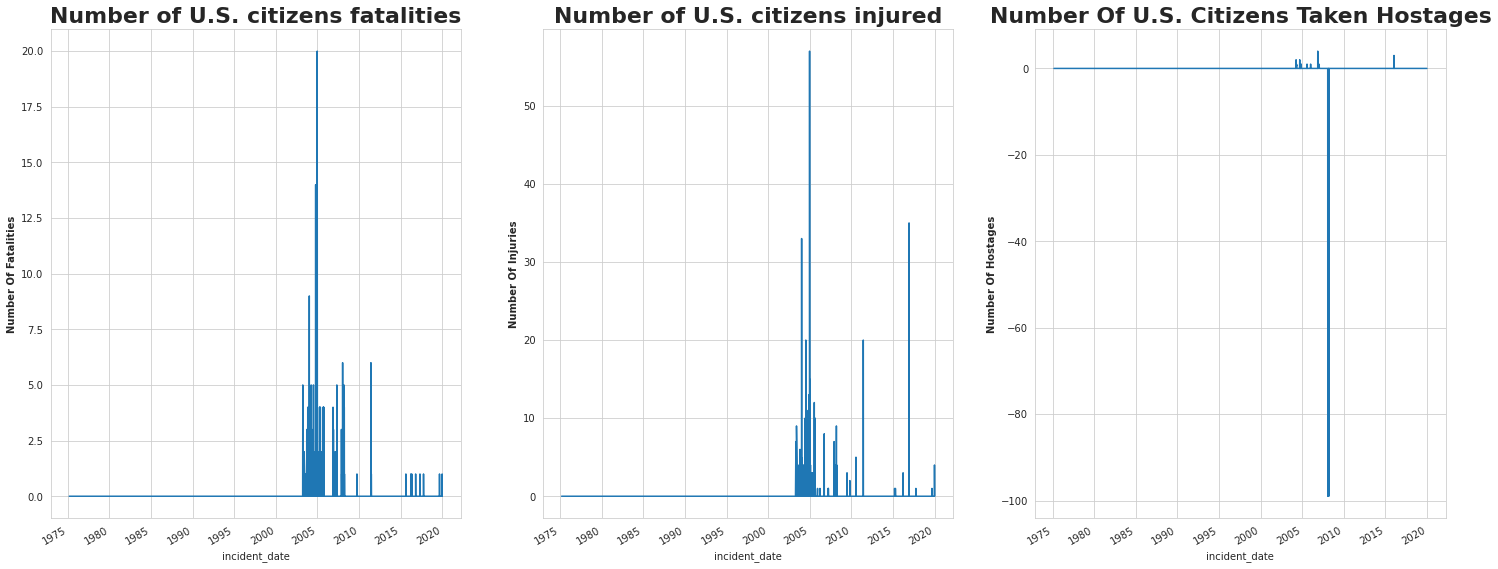

In [17]:
sns.set_style("whitegrid")
figure = plt.figure() 
ax = figure.add_subplot(1,3,1)
ax = iraq_df.set_index('incident_date')['nkillus'].interpolate().plot(figsize=(25,10))
ax.set_title("Number of U.S. citizens fatalities", fontweight='bold', fontsize=22)
ax.set_ylabel("Number Of Fatalities", fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(1,3,2)
ax = iraq_df.set_index('incident_date')['nwoundus'].interpolate().plot(figsize=(25,10))
ax.set_title("Number of U.S. citizens injured", fontweight='bold', fontsize=22)
ax.set_ylabel("Number Of Injuries", fontweight='bold')
ax.grid(True)

ax = figure.add_subplot(1,3,3)
ax = iraq_df.set_index('incident_date')['nhostkidus'].interpolate().plot(figsize=(25,10))
ax.set_title("Number of U.S. citizens taken hostages".title(), fontweight='bold', fontsize=22)
ax.set_ylabel("Number Of Hostages", fontweight='bold')
ax.grid(True)